### Выбор локации для скважины

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
state = np.random.RandomState(24)
from scipy import stats as st
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score 
from sklearn.preprocessing import StandardScaler 
pd.options.mode.chained_assignment = None
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve 


In [2]:
# считываем датафрейм
try:
    df_0 = pd.read_csv('C:\\Python\\ЯП\\проект_6\\geo_data_0.csv', sep=',')
    df_1 = pd.read_csv('C:\\Python\\ЯП\\проект_6\\geo_data_1.csv', sep=',')
    df_2 = pd.read_csv('C:\\Python\\ЯП\\проект_6\\geo_data_2.csv', sep=',')
    
except:
    df_0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv', sep=',')
    df_1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv', sep=',')
    df_2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv', sep=',')

•	id — уникальный идентификатор скважины;

•	f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);


•	product — объём запасов в скважине (тыс. баррелей).


In [3]:
df_0.head(3)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647


### Предобработка данных

In [4]:
count = 0
for i in [df_0,df_1,df_2]:
    print('Для ' + str(count) + ' региона:')
    print(i.isnull().sum())
    print(' ')
    print(i.info())
    print(' ')
    print('Размер выборки = ' + str(i.shape))
    print(' ')
    count+= 1

Для 0 региона:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
 
Размер выборки = (100000, 5)
 
Для 1 региона:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  flo

Пропусков в данных нет, все три датафрейма одинаковых размеров.

Проверим столбец id на наличие дубликатов

In [5]:
df_0['id'].duplicated().sum()

10

In [6]:
df_1['id'].duplicated().sum()

4

In [7]:
df_2['id'].duplicated().sum()

4

Удалим дубликаты

In [8]:
df_0=df_0.drop(df_0[df_0['id'].duplicated()].index)
df_1=df_1.drop(df_1[df_1['id'].duplicated()].index)
df_2=df_2.drop(df_2[df_2['id'].duplicated()].index)

Дубликатов в столбцах с id больше нет

#### Исследуем нулевой регион

In [9]:
df_0.describe()

,f0,f1,f2,product
count,99990.000000,99990.000000,99990.000000,99990.000000
mean,0.500454,0.250141,2.502629,92.499684
std,0.871844,0.504430,3.248149,44.288304
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072572,-0.200877,0.287784,56.497069
50%,0.502405,0.250252,2.515969,91.847928
75%,1.073626,0.700640,4.715035,128.563699
max,2.362331,1.343769,16.003790,185.364347


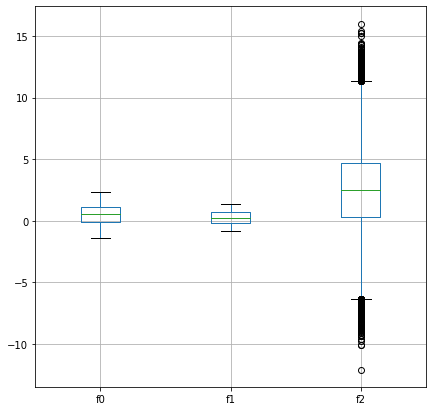

In [10]:
df_0[['f0','f1','f2']].boxplot(figsize=(7,7));

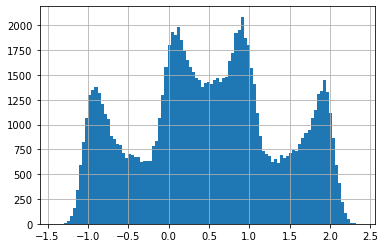

In [11]:
df_0['f0'].hist(bins = 100);

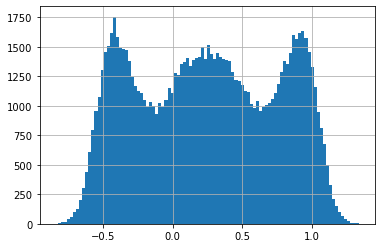

In [12]:
df_0['f1'].hist(bins = 100);

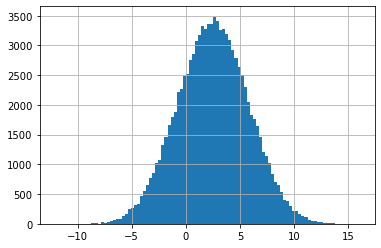

In [13]:
df_0['f2'].hist(bins = 100);

Судя по боксплоту и гистограммам у признака f2 много выбросов и он имеет нормальное распределение. У метрик f1 f0 распределение ненормальное, но и выбросов нет

Удалим выбросы:

In [14]:
df_0[df_0['f2'] > 11.45].shape

(233, 5)

In [15]:
df_0[df_0['f2'] < -6.45].shape

(237, 5)

In [16]:
df_0.shape

(99990, 5)

In [17]:
df_0=df_0.drop(df_0[df_0['f2'] > 11.4].index)

In [18]:
df_0=df_0.drop(df_0[df_0['f2'] < -6.4].index)

In [19]:
df_0.shape

(99498, 5)

удалили корректно. Объем удаленных данных меньше процента

#### Исследуем первый регион

In [20]:
df_1.describe()

,f0,f1,f2,product
count,99996.000000,99996.000000,99996.000000,99996.000000
mean,1.141209,-4.796608,2.494501,68.823916
std,8.965815,5.119906,1.703579,45.944663
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011475,57.085625
75%,8.620964,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


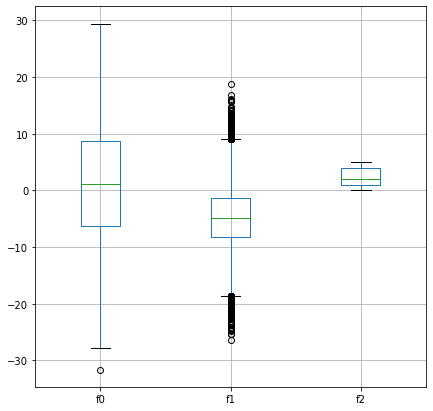

In [21]:
df_1[['f0','f1','f2']].boxplot(figsize = (7,7));

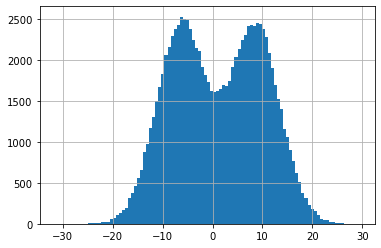

In [22]:
df_1['f0'].hist(bins = 100);

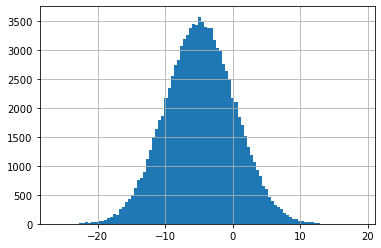

In [23]:
df_1['f1'].hist(bins = 100);

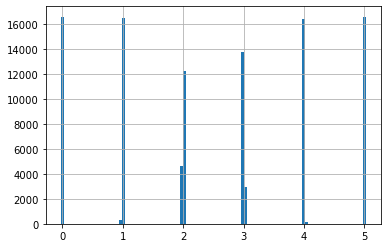

In [24]:
df_1['f2'].hist(bins = 100);

Судя по боксплоту и гистограммам у признака f1 много выбросов и он имеет нормальное распределение. У метрик f2 f0 распределение ненормальное, но и выбросов нет

Удалим выбросы:

In [25]:
df_1[df_1['f1'] > 9].shape

(348, 5)

In [26]:
df_1[df_1['f1'] < -18.5].shape

(335, 5)

In [27]:
df_1=df_1.drop(df_1[df_1['f1'] > 9].index)

In [28]:
df_1=df_1.drop(df_1[df_1['f1'] < -18.5].index)

In [29]:
df_1.shape

(99313, 5)

#### Исследуем второй регион

In [30]:
df_2.describe()

,f0,f1,f2,product
count,99996.000000,99996.000000,99996.000000,99996.000000
mean,0.002002,-0.002159,2.495084,94.998342
std,1.732052,1.730397,3.473482,44.749573
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162328,-1.174841,0.130269,59.450028
50%,0.009424,-0.009661,2.484236,94.925026
75%,1.158477,1.163523,4.858720,130.586815
max,7.238262,7.844801,16.739402,190.029838


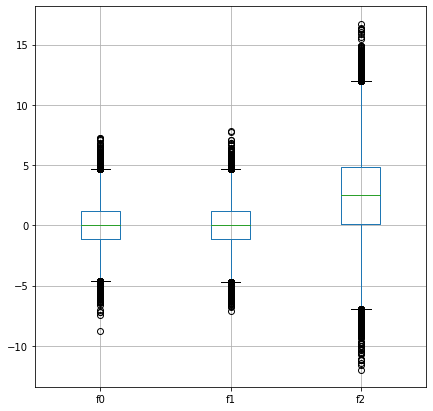

In [31]:
df_2[['f0','f1','f2']].boxplot(figsize = (7,7));

In [32]:
df_2=df_2.drop(df_2[df_2['f0'] > 4.5].index)

In [33]:
df_2=df_2.drop(df_2[df_2['f0'] < -4].index)

In [34]:
df_2=df_2.drop(df_2[df_2['f1'] > 4.5].index)

In [35]:
df_2=df_2.drop(df_2[df_2['f1'] < -4].index)

In [36]:
df_2=df_2.drop(df_2[df_2['f2'] > 11.5].index)

In [37]:
df_2=df_2.drop(df_2[df_2['f2'] < -6.5].index)

In [38]:
df_2.shape

(96172, 5)

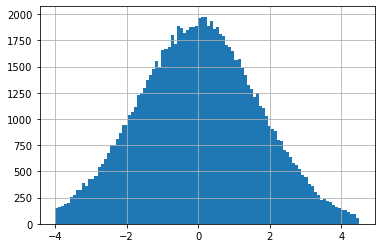

In [39]:
df_2['f0'].hist(bins = 100);

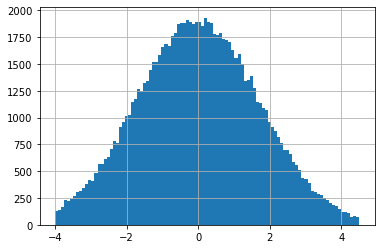

In [40]:
df_2['f1'].hist(bins = 100);

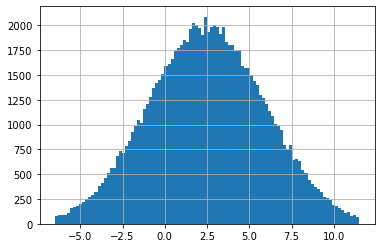

In [41]:
df_2['f2'].hist(bins = 100);

Судя по боксплоту и гистограммам у признаков f0,f1,f2 много выбросов и они имеют нормальное распределение.

Выводы: Предобработали данные 3-х датасетов. Устранили дубликаты и выбросы. Исследовали форму распределения.

### Построение модели линейной регрессии

Отделим фичи от таргетных значений

In [42]:
features_0 = df_0.drop(['product','id'], axis = 1)# извлеките признаки 
target_0 = df_0['product'] # извлеките целевой признак

разобьем на трейновую и тестовую выборки

In [43]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, test_size = 0.25, random_state = 12345) # отделите 25% данных для вал-ой выборки

In [44]:
df_1.head(3)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305


In [45]:
features_1 = df_1.drop(['product','id'], axis = 1)
target_1 = df_1['product'] 

In [46]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size = 0.25, random_state = 12345)

In [47]:
df_2.head(3)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910


In [48]:
features_2 = df_2.drop(['product','id'], axis = 1)
target_2 = df_2['product']

In [49]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size = 0.25, random_state = 12345)

инициализируем модель LinearRegression и оформим как функцию

In [50]:
def funk_model(features_train,target_train,target_valid, features_valid):
    
    model = LinearRegression()
    model.fit(features_train, target_train) 
    predictions_valid = model.predict(features_valid) # получите предсказания модели на валидационной выборке
    mean = predictions_valid.mean()
    MSE = mean_squared_error(target_valid, predictions_valid)
    RMSE = MSE**0.5# посчитайте значение метрики RMSE на валидационной выборке
    
    print("RMSE модели линейной регрессии на валидационной выборке:", RMSE )
    print("средний запас предсказанного сырья месторождения", mean )
    print(' ')
    return predictions_valid

Применим функцию с помощью цикла:

In [51]:
predictions_valid_0 = []
predictions_valid_1 = []
predictions_valid_2 = []
count=0
for i in [(features_train_0,target_train_0,target_valid_0, features_valid_0,predictions_valid_0),
          (features_train_1,target_train_1,target_valid_1, features_valid_1,predictions_valid_1),
          (features_train_2,target_train_2,target_valid_2, features_valid_2,predictions_valid_2)]:
    print('Для месторождения №',count)
    pred = funk_model(i[0],i[1],i[2],i[3])
    i[4].append(pred)
    count+=1

Для месторождения № 0
RMSE модели линейной регрессии на валидационной выборке: 37.704227357074025
средний запас предсказанного сырья месторождения 92.4657279462084
 
Для месторождения № 1
RMSE модели линейной регрессии на валидационной выборке: 0.8957076630622065
средний запас предсказанного сырья месторождения 69.06478300011143
 
Для месторождения № 2
RMSE модели линейной регрессии на валидационной выборке: 39.9453565736291
средний запас предсказанного сырья месторождения 94.8292213272688
 


In [52]:
predictions_valid_0

[array([103.26132529, 112.04872114,  83.43594111, ...,  98.26492643,
         55.67217845,  82.20299732])]

Применим функцию к трем регионам

In [53]:
predictions_valid_0 = funk_model(features_train_0,target_train_0,target_valid_0, features_valid_0)
predictions_valid_1 = funk_model(features_train_1,target_train_1,target_valid_1, features_valid_1)
predictions_valid_2 = funk_model(features_train_2,target_train_2,target_valid_2, features_valid_2)

RMSE модели линейной регрессии на валидационной выборке: 37.704227357074025
средний запас предсказанного сырья месторождения 92.4657279462084
 
RMSE модели линейной регрессии на валидационной выборке: 0.8957076630622065
средний запас предсказанного сырья месторождения 69.06478300011143
 
RMSE модели линейной регрессии на валидационной выборке: 39.9453565736291
средний запас предсказанного сырья месторождения 94.8292213272688
 


Подсчитали метрику RMSE  и средний запас сырья для каждого участка

По условию мы должны отобрать лучшие 200 скважин. Отсортируем и посмотрим средние величины там.

In [54]:
best_200_0 = sorted(predictions_valid_0)[-200:]
np.mean(best_200_0)

152.215579066362

In [55]:
best_200_1 = sorted(predictions_valid_1)[-200:]
np.mean(best_200_1)

138.73978231150753

In [56]:
best_200_2 = sorted(predictions_valid_2)[-200:]
np.mean(best_200_2)

142.78695097265665

Выводы: 

Получили результаты по трем месторождениям:
Наибольший средний запас у первого и третьего месторождений(с небольшой разницей), при этом у второго месторождения значение RMSE значительно меньше.

### Расчёт прибыли

•	При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.

•	Бюджет на разработку скважин в регионе — 10 млрд рублей (в тысячах руб).

In [57]:
BUDGET = 10_000_000

Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей

In [58]:
DOHOD_1_PRODUCT = 450

•	После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

In [59]:
alpha = 0.025

Итак, прикинем какой объем сырья нам нужно добыть чтобы не "вылезти" за пределы 10 млрд руб:

In [60]:
MIN_V = BUDGET / DOHOD_1_PRODUCT
MIN_V

22222.222222222223

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.

In [61]:
MIN_V / 200

111.11111111111111

In [62]:
111.11111111111111*450

50000.0

не менее 111  единиц продукта (или 50000 в денежном эквиваленте) в среднем должны содержать лучшие 200 скважин в регионе

Выводы: средние цифры по регионам (80-88) несколько меньше чем необходимый порог (111), Если рассматривать лучшие 200 скважин в каждом регионе то вроде все не так и плохо...

## Суммарная прибыль лучших скважин в каждом регионе. Расчет риска убытков

Посчитаем прибыль в каждом регионе из наших 200 лучших скважин:

Для первого региона

In [63]:
sum_volume_0 = np.sum(best_200_0)

In [64]:
money_0 = sum_volume_0*DOHOD_1_PRODUCT
money_0

13699402.11597258

Для второго региона

In [65]:
sum_volume_1 = np.sum(best_200_1)

In [66]:
money_1 = sum_volume_1*DOHOD_1_PRODUCT
money_1

12486580.408035679

Для третьего региона

In [67]:
sum_volume_2 = np.sum(best_200_2)

In [68]:
money_2 = sum_volume_2*DOHOD_1_PRODUCT
money_2

12850825.5875391

Для дальнейшей работы приведем наши предсказания в вид серии

In [69]:
type(predictions_valid_0)

numpy.ndarray

In [70]:
predictions_valid_0 = pd.Series(predictions_valid_0)
predictions_valid_1 = pd.Series(predictions_valid_1)
predictions_valid_2 = pd.Series(predictions_valid_2)

In [71]:
predictions_valid_0.sort_values(ascending=False)[:200]

5563     167.330846
7038     163.182073
8867     162.472845
15896    162.275957
22983    162.181657
            ...    
18498    146.513256
11555    146.492163
23557    146.388825
11806    146.380180
20532    146.374318
Length: 200, dtype: float64

#### Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.

In [72]:
# функция расчета прибыли
def profit_calculation(targets, predictions, number_of_wells, price):
    # отсортируем предсказания
    pred_sorted = predictions.sort_values(ascending=False)[:number_of_wells]
    
    #топовые скважины
    top_wells = targets[pred_sorted.index]
    
    # доход
    revenue = price*top_wells.sum().round()
    
    # вычитаем из дохода затраты на разработку
    return revenue-BUDGET
 
# расчет прибыли
profit_results = []

скорректируем индексы для дальнейшей работы

In [73]:
target_valid_0 = target_valid_0.reset_index(drop=True)
target_valid_1 = target_valid_1.reset_index(drop=True)
target_valid_2 = target_valid_2.reset_index(drop=True)

In [74]:
target_valid_0

0        145.316275
1        164.182655
2         56.051131
3         57.336710
4        159.578082
            ...    
24870    143.025959
24871    123.947080
24872     26.662216
24873     37.720923
24874     12.714491
Name: product, Length: 24875, dtype: float64

In [75]:
predictions_valid_0

0        103.261325
1        112.048721
2         83.435941
3         62.295483
4        119.175989
            ...    
24870    105.878321
24871    101.918248
24872     98.264926
24873     55.672178
24874     82.202997
Length: 24875, dtype: float64

создание распределений прибыли с помощью бутстрепа

In [76]:
profit_results = []

for i in [(target_valid_0, predictions_valid_0),
          (target_valid_1, predictions_valid_1),
          (target_valid_2, predictions_valid_2)]:
    profit_results.append(profit_calculation(i[0], i[1], 200, 450))

Посмотрим что получилось:

In [77]:
profit_results

[3001850.0, 2415050.0, 2121650.0]

In [78]:
# создание распределений прибыли с помощью бутстрепа
profit_bs_0 = []
profit_bs_1 = []
profit_bs_2 = []

In [79]:
for i in [(target_valid_0, predictions_valid_0, profit_bs_0),(target_valid_1, predictions_valid_1, profit_bs_1),(target_valid_2, predictions_valid_2, profit_bs_2)]:
   
    for k in range(1000):
        target_subsample = i[0].sample(500, replace=True, random_state=state)
        pred_subsample = i[1][target_subsample.index]
        prof = profit_calculation(target_subsample, pred_subsample, 200, 450)
        i[2].append(prof)

Распределения нашли!

посмотрим на средние значения прибыли

In [80]:
np.mean(profit_bs_0)

624682.7

In [81]:
np.mean(profit_bs_1)

693333.8

In [82]:
np.mean(profit_bs_2)

545985.8

Найдем 95% доверительный интервал

In [83]:
profit_bs_0 = pd.Series(profit_bs_0)
profit_bs_1 = pd.Series(profit_bs_1)
profit_bs_2 = pd.Series(profit_bs_2)

#### 95% доверительный интервал для 0-го региона

In [84]:
confidence_interval_0 = []

lower = profit_bs_0.quantile(0.025)
upper = profit_bs_0.quantile(0.975)

confidence_interval_0.append(lower)
confidence_interval_0.append(upper)

confidence_interval_0

[52820.00000000001, 1272106.25]

#### 95% доверительный интервал для 1-го региона

In [85]:
confidence_interval_1 = []


lower = profit_bs_1.quantile(0.025)
upper = profit_bs_1.quantile(0.975)

confidence_interval_1.append(lower)
confidence_interval_1.append(upper)

confidence_interval_1

[210038.75, 1264163.7499999998]

#### 95% доверительный интервал для 2-го региона

In [86]:
confidence_interval_2 = []


lower = profit_bs_2.quantile(0.025)
upper = profit_bs_2.quantile(0.975)

confidence_interval_2.append(lower)
confidence_interval_2.append(upper)

confidence_interval_2

[-72156.25, 1206721.2499999998]

Найдите риск убытков. Убыток — это отрицательная прибыль.

In [87]:
print('Риск убытка в нулевом регионе =',(pd.Series(profit_bs_0) < 0).mean() * 100)
print('Риск убытка во первом регионе =',(pd.Series(profit_bs_1) < 0).mean() * 100)
print('Риск убытка в втором регионе =',(pd.Series(profit_bs_2) < 0).mean() * 100)

Риск убытка в нулевом регионе = 1.7000000000000002
Риск убытка во первом регионе = 0.1
Риск убытка в втором регионе = 4.1000000000000005


In [88]:
print('Риск убытка в нулевом регионе =', stats.percentileofscore(profit_bs_0, 0))
print('Риск убытка во первом регионе =',stats.percentileofscore(profit_bs_1, 0))
print('Риск убытка в втором регионе =',stats.percentileofscore(profit_bs_2, 0))

Риск убытка в нулевом регионе = 1.7
Риск убытка во первом регионе = 0.1
Риск убытка в втором регионе = 4.1


Выводы: По условиям рисков (вероятность убытков меньше 2.5%) проходит первый и нулевой регионы.

# Выводы:



   Наиболее привлекательной считаем 1-й участок, т.к. там :
  - наиболее привлекательный риск убытка (0.1%)
  - низкое значение RMSE модели
  - наибольший расчет прибыли с помощью бутстрепа
  
Второй участок не подходит по условиям риска убытков (>2.5%)